## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice.
data_df["Mouse ID"].nunique()

249

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_df = pd.DataFrame(data_df,columns = ['Mouse ID', 'Timepoint'])
dupes = dupes_df[dupes_df.duplicated()]

dupes

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [50]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_info= data_df.loc[data_df['Mouse ID']=="g989", :]
duplicate_mice_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice_df = data_df[data_df['Mouse ID'].isin(dupes)==False]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice in the clean DataFrame.
clean_mice= clean_mice_df['Mouse ID'].nunique()
clean_mice

249

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

combine_df_groupby = combine_df.groupby(["Drug_Regimen"])
mean_tumor_vol = combine_df_groupby ["Tumor_Volume_mm3"].mean()
median_tumor_vol = combine_df_groupby ["Tumor_Volume_mm3"].median()
variance_tumor_vol = combine_df_groupby ["Tumor_Volume_mm3"].var()
std_tumor_vol = combine_df_groupby ["Tumor_Volume_mm3"].std()
sem_tumor_vol = combine_df_groupby ["Tumor_Volume_mm3"].sem()


summary_stat = pd.DataFrame({"mean_tumor_vol":mean_tumor_vol,
                             "median_tumor_vol":median_tumor_vol,
                             "variance_tumor_vol":variance_tumor_vol,
                             "std_tumor_vol":std_tumor_vol,
                             "sem_tumor_vol":sem_tumor_vol})
summary_stat

,mean_tumor_vol,median_tumor_vol,variance_tumor_vol,std_tumor_vol,sem_tumor_vol
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

sum_stat_agg = combine_df_groupby[["Tumor_Volume_mm3"]].agg(["mean","median","var","std","sem"])

sum_stat_agg

Tumor_Volume_mm3                                          
                         mean     median        var       std       sem
Drug_Regimen                                                           
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin            52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol           52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril            55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol            54.331565  52.509285  66.173479  8.134708  0.596466
Placebo             54.033581  52.288934  61.168083  7.821003  0.581331
Propriva            52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane            40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn            54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol           53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

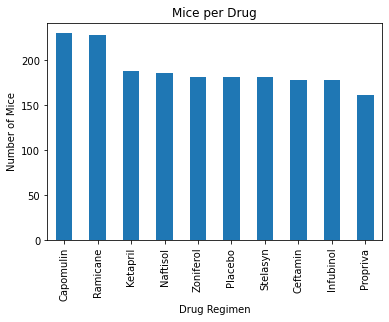

In [55]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mice_count=clean_mice_df['Drug Regimen'].value_counts()

pandas_bar= mice_count.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Mice per Drug')
plt.show()

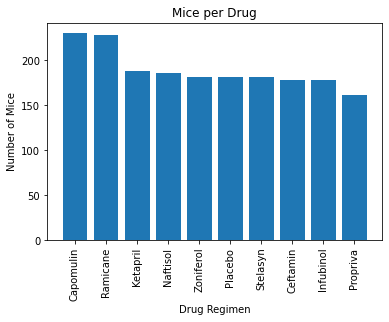

In [56]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_x_axis= mice_count.index.values
drug_y_axis= mice_count.values

plt.bar(drug_x_axis, drug_y_axis)
plt.title('Mice per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation='vertical')
plt.show()

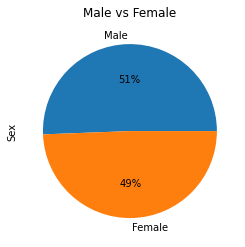

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_pie= clean_mice_df['Sex'].value_counts()
gender_pie.plot.pie(autopct='%1.f%%')
plt.title('Male vs Female')
plt.show()

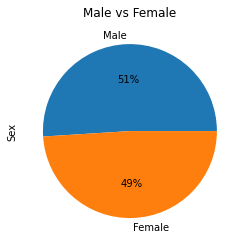

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels= ['Male', 'Female']
sizes= [51, 49]
plt.pie(sizes, labels= labels, autopct='%1.f%%')
plt.ylabel('Sex')
plt.title('Male vs Female')
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = combine_df.groupby(["Mouse_ID"])

max_timepoint_df = max_timepoint_df ["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_merge_df = pd.merge(max_timepoint_df, combine_df, how="left", on=["Mouse_ID","Timepoint"] )


In [60]:
# Put treatments into a list for for loop (and later for plot labels)

drug_cap_df = new_merge_df.loc[lambda combine_df: combine_df['Drug_Regimen'] == 'Capomulin']
drug_ram_df = new_merge_df.loc[lambda combine_df: combine_df['Drug_Regimen'] == 'Ramicane']  
drug_inf_df = new_merge_df.loc[lambda combine_df: combine_df['Drug_Regimen'] == 'Infubinol'] 
drug_cef_df = new_merge_df.loc[lambda combine_df: combine_df['Drug_Regimen'] == 'Ceftamin'] 


# Create empty list to fill with tumor vol data (for plotting)

list_drug_cap = []
list_drug_ram = []
list_drug_inf = []
list_drug_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 

drug_cap_df = drug_cap_df["Tumor_Volume_mm3"]
drug_cap_df = drug_cap_df.reset_index()
list_drug_cap = drug_cap_df['Tumor_Volume_mm3'].values.tolist()

drug_ram_df = drug_ram_df["Tumor_Volume_mm3"]
drug_ram_df = drug_ram_df.reset_index()
list_drug_ram = drug_ram_df['Tumor_Volume_mm3'].values.tolist()

drug_inf_df = drug_inf_df["Tumor_Volume_mm3"]
drug_inf_df = drug_inf_df.reset_index()
list_drug_inf = drug_inf_df['Tumor_Volume_mm3'].values.tolist()

drug_cef_df = drug_cef_df["Tumor_Volume_mm3"]
drug_cef_df = drug_cef_df.reset_index()
list_drug_cef = drug_cef_df['Tumor_Volume_mm3'].values.tolist()

    
    # Determine outliers using upper and lower bounds
quartiles = drug_cap_df['Tumor_Volume_mm3'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for index in range(len(list_drug_cap)):
    if list_drug_cap[index] <= lower_bound :
        print (f'Outlier for Capomulin Drug_Regimen = {list_drug_cap[index]}')
    if list_drug_cap[index] >= upper_bound :
        print (f'Outlier for Capomulin Drug_Regimen = {list_drug_cap[index]}')

#Drug Regimen Ramicane
quartiles = drug_ram_df['Tumor_Volume_mm3'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for index in range(len(list_drug_ram)):
    if list_drug_ram[index] <= lower_bound :
        print (f'Outlier for Ceftamin Drug_Regimen = {list_drug_ram[index]}')
    if list_drug_ram[index] >= upper_bound :
        print (f'Outlier for Ceftamin Drug_Regimen = {list_drug_ram[index]}')

#Drug Regimen Infubinol
quartiles = drug_inf_df['Tumor_Volume_mm3'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for index in range(len(list_drug_inf)):
    if list_drug_inf[index] <= lower_bound :
        print (f'Outlier for Infubinol Drug_Regimen = {list_drug_inf[index]}')
    if list_drug_inf[index] >= upper_bound :
        print (f'Outlier for Infubinol Drug_Regimen = {list_drug_inf[index]}')

#Drug Regimen Ceftamin
quartiles = drug_cef_df['Tumor_Volume_mm3'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for index in range(len(list_drug_cef)):
    if list_drug_cef[index] <= lower_bound :
        print (f'Outlier for Ceftamin Drug_Regimen = {list_drug_cef[index]}')
    if list_drug_cef[index] >= upper_bound :
        print (f'Outlier for Ceftamin Drug_Regimen = {list_drug_cef[index]}')    

Outlier for Infubinol Drug_Regimen = 36.321345799999996


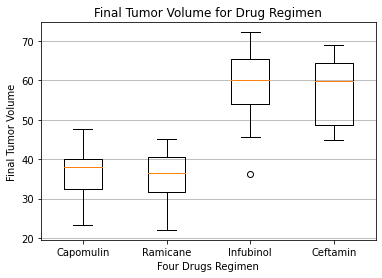

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [list_drug_cap, list_drug_ram, list_drug_inf, list_drug_cef]
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume for Drug Regimen')
ax.boxplot(data)
plt.ylabel('Final Tumor Volume')
ax.yaxis.grid(True)
plt.xlabel('Four Drugs Regimen')
plt.setp(ax, xticks=[y + 1 for y in range(len(data))],
         xticklabels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

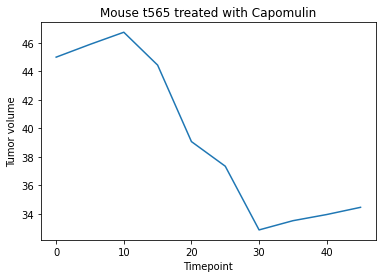

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 't565'
drug_cap_all_data_df = combine_df.loc[lambda combine_df: combine_df['Drug_Regimen'] == 'Capomulin']
c_df_mouse = drug_cap_all_data_df.loc[lambda combine_df: combine_df['Mouse_ID'] == mouse_id]

y_axis = c_df_mouse.Tumor_Volume_mm3
x_axis = c_df_mouse.Timepoint

plt.title(f'Mouse {mouse_id} treated with Capomulin')
plt.ylabel("Tumor volume")
plt.xlabel("Timepoint")
plt.plot(x_axis, y_axis)

plt.show()

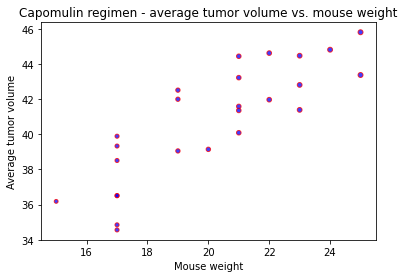

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
c_df_group = drug_cap_all_data_df.groupby(["Mouse_ID","Weight (g)"])
c_df_group = c_df_group["Tumor_Volume_mm3"].mean()
c_df_group = c_df_group.reset_index()

y_axis = c_df_group.Tumor_Volume_mm3
x_axis = c_df_group["Weight (g)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="red",
            s=x_axis, alpha=0.75)
plt.title("Capomulin regimen - average tumor volume vs. mouse weight")
plt.ylabel("Average tumor volume")
plt.xlabel("Mouse weight")
plt.show()

## Correlation and Regression

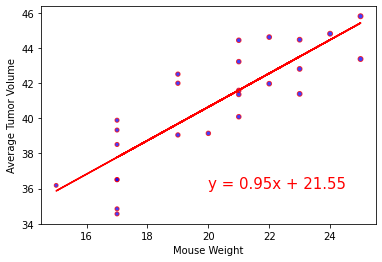

The correlation between both factors is 0.84


In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="red",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.ylabel('Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.show()
print(f"The correlation between both factors is {round(rvalue,2)}")